In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint, bernoulli, binom, uniform, norm, expon
from scipy.stats.distributions import poisson

### Задание 7.7
Случайная величина задана таблицей:

X | -1 | 0 | 1 | 2
- | - | - | - | -
P | 0.5|  0.2|  0.2|  0.1

Найдите стандартное отклонение . Ответ округлите до двух знаков после точки-разделителя.

In [8]:
x = np.array([-1,0,1,2])
p = np.array([0.5,0.2,0.2,0.1])

M_x = (x*p).sum()
M_x2 = (x*x*p).sum()
D = (x*x*p).sum() - ((x*p).sum())**2
s = np.sqrt(D)
round(s,2)

1.04

### РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ
**Равномерное распределение** — это распределение вероятностей, в качестве значений которого могут выступать любые целые числа от $1$ до $N$, а вероятности их появления одинаковы.

$$EX = \frac{N+1}{2}$$    
$$\sigma_X = \sqrt{\frac{N^2 - 1}{12}}$$


In [9]:
x = np.arange(1, 7)
disc_uni_dist = randint(1,7)
pmf = disc_uni_dist.pmf(x)
print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [10]:
cdf = disc_uni_dist.cdf(x)
print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


#### РАСПРЕДЕЛЕНИЕ БЕРНУЛЛИ
$$P(X = x)= \left\{\begin{matrix} p & x = 1\\ 1 - p & x = 0 \\ \end{matrix}\right.$$

$$EX = 1 \cdot p + 0 \cdot (1-p) = p$$

$$\sigma_X = \sqrt{p(1-p)}$$

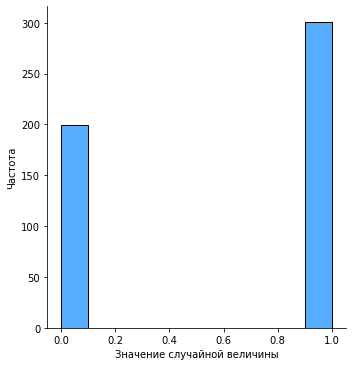

In [11]:
data = bernoulli.rvs(size=500,p=0.6)
ax = sns.displot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')
plt.show()

In [12]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)


[[  0 199]
 [  1 301]]


### БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ
**Биномиальным называют** распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.  

Параметры биномиального распределения — $n$ и $p$, где  — $n$ общее количество испытаний, а $p$ — вероятность успеха в каждом испытании.

Для того чтобы оценить вероятность, что среди $n$ испытаний будет $k$ успехов, используют следующую формулу:
$$P(X = k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}$$

$$\begin{pmatrix} n \\ k \end{pmatrix} = \frac{n!}{k! (n-k)!}$$


$$EX = np$$
$$\sigma_X = \sqrt{np (1-p)}$$

Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

$$P(X = k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}$$
$$\begin{pmatrix} 10 \\ 8 \end{pmatrix} (0.8)^8 (0.2)^2 + \begin{pmatrix} 10 \\ 9 \end{pmatrix} (0.8)^9 (0.2)^1 + \begin{pmatrix} 10 \\ 10 \end{pmatrix} (0.8)^{10} \approx 0.678$$

In [13]:
binom.pmf(8,10,0.8)+binom.pmf(9,10,0.8)+binom.pmf(10,10,0.8)

0.6777995264000004

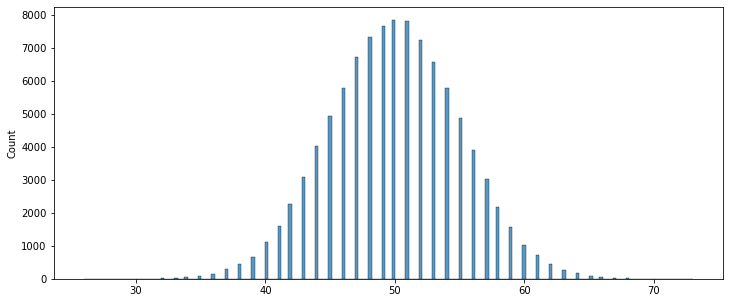

In [52]:
x = np.random.binomial(n=10, p=0.5, size=10)

plt.figure(figsize=(12,5))
sns.histplot(np.random.binomial(n=100, p=0.5, size=100000),  kde=False)
plt.show()

### РАСПРЕДЕЛЕНИЕ ПУАССОНА
Распределение Пуассона — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

$$EX  = \lambda$$
$$\sigma_X = \sqrt{\lambda}$$,
Чтобы рассчитать вероятность того, что за период времени произойдёт $k$ событий, можно пользоваться следующей формулой:

$$P(X = k) = \frac{\lambda^k e^{- \lambda}}{k!}$$

```
Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.

Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вызовы удерживались в ожидании ответа не более 10 % времени?
```
Рассчитаем вероятности для всех возможных количеств операторов, пока не получим вероятность того, что вызов находится на удержании, которая будет меньше 10 %:  
![](https://lms.skillfactory.ru/assets/courseware/v1/448605de0326953c53753ad5de9752c8/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/MATHML_md7_8_3.png)   
В качестве параметра  мы берём среднее количество звонков, так как это наше ожидаемое число событий, а в качестве  — количество операторов, т. к. в данный период времени мы сможем принять столько звонков (один оператор принимает один звонок).

Получаем, что колл-центру необходимо нанять на работу хотя бы семь операторов.

---------------------------------
Разумеется, все эти значения можно было бы рассчитать намного проще с использованием функций Python. Например, для пяти операторов мы бы получили следующее выражение:

In [19]:
poisson.pmf(6, 4.5), poisson.pmf(7, 4.5)

(0.1281201438645839, 0.08236294962723255)

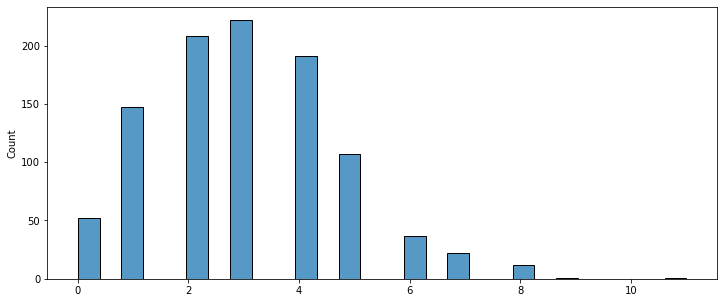

In [25]:
plt.figure(figsize=(12,5))
sns.histplot(np.random.poisson(lam=3, size=1000), kde=False)
plt.show()

### Задание 8.3
Вы стреляете по мишени. Вероятность набрать максимальное количество очков составляет 7 %. В этом случае вы выиграете плюшевого медведя стоимостью 5000 рублей. Если наберёте меньше максимума, то не выиграете ничего.

Сколько должен стоить билет, чтобы обеспечить игру, в которой выигрыш равен вашим ожидаемым затратам и ожидаемым затратам продавца?

In [29]:
0.07*5000

350.00000000000006

#### Задание 8.4
Вы купили 85 лотерейных билетов. Для каждого из них вероятность выигрыша составляет 0.001.

Найдите математическое ожидание для количества выигрышных билетов.

In [30]:
0.001*85

0.085

### Задание 8.6
Сеть ресторанов быстрого питания проводит акцию, в рамках которой в одной из четырёх коробок картофеля фри лежит купон на бесплатную коробку картофеля фри. Предположим, что где-то продаётся 100 таких коробок в день. Пусть $X$ равно количеству выигранных купонов за день.

Найдите среднее значение и стандартное отклонение для $X$. Если результат дробное число, округлите ответ до одного знака после точки-разделителя.

In [43]:
p = 0.25
n= 100
e_x = p*n
sigma_x = np.sqrt(n*p*(1-p))
print(f'E(x):{e_x}      \N{greek small letter sigma}: {sigma_x:.1f}')

E(x):25.0      Σ: 4.3


### Задание 8.7
Пассажиры прибывают на вокзал со средней скоростью $\lambda = 4$ человека в минуту.

Если количество пассажиров, приезжающих на вокзал, подчиняется распределению Пуассона, какова приблизительная вероятность того, что 16 пассажиров приедут на вокзал в конкретный четырёхминутный период? Округлите ответ до трёх знаков после точки-разделителя.

In [56]:
lmda = 4
ans = poisson.pmf(16, 4*lmda)
round(ans,3)

0.099

In [ ]:
scipy.stats.distributions.poisson.pmf(16, 16)

## Непрерывные распределения

### РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ
Случайная величина, которая распределена по непрерывному равномерному закону, может принимать в качестве значения любое вещественное число в заданном отрезке от $a$ до $b$ и имеет следующее математическое ожидание и дисперсию:
$$EX = \frac{a+b}{2}$$
$$\sigma_X = \frac{b-a}{\sqrt{12}}$$

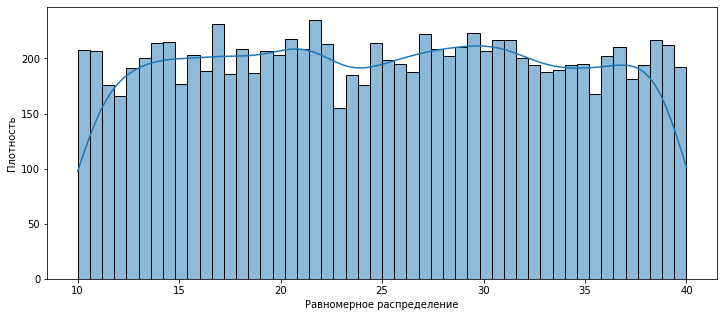

In [67]:
# data = uniform.rvs(size=10000, loc = 10, scale=30)
# ax = sns.distplot(data,
#                   bins=50)
# ax.set(xlabel='Равномерное распределение', ylabel='Плотность')

data = uniform.rvs(size=10000, loc = 10, scale=30)
plt.figure(figsize=(12,5))
sns.histplot(data, bins=50,kde=True)
plt.xlabel('Равномерное распределение')
plt.ylabel('Плотность')
plt.show()

### НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ
Обычно гауссовское распределение определяется через математическое ожидание и стандартное отклонение — это записывается следующим образом:
$$X \sim Normal (\mu, \sigma^2)$$
Плотность нормального распределения задаётся формулой:
$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$$

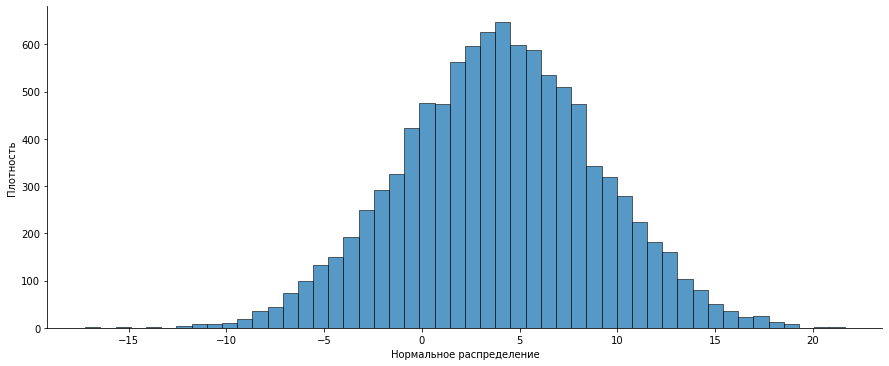

In [9]:
data = norm.rvs(size=10000,loc=4,scale=5)
ax = sns.displot(data,
                  bins=50)
ax.fig.set_size_inches(14,5)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность')
plt.show()

In [10]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


### ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ
Экспоненциальное распределение — это распределение вероятностей времени между событиями в процессе Пуассона.
Плотность экспоненциального распределения задаётся следующей формулой:
$$f(x) = \left\{\begin{matrix} 0, & x < 0 \\ \lambda e^{- \lambda x}, & x \geq 0 \\ \end{matrix}\right.$$
В качестве параметра $\lambda$ здесь берётся ожидаемое число событий за единицу времени.
$$EX =  1/ \lambda$$
$$\sigma_X =  1/ \lambda$$

Вероятность того, что значение случайной величины будет не больше $x$, равна: $1 - e^{- \lambda x}$

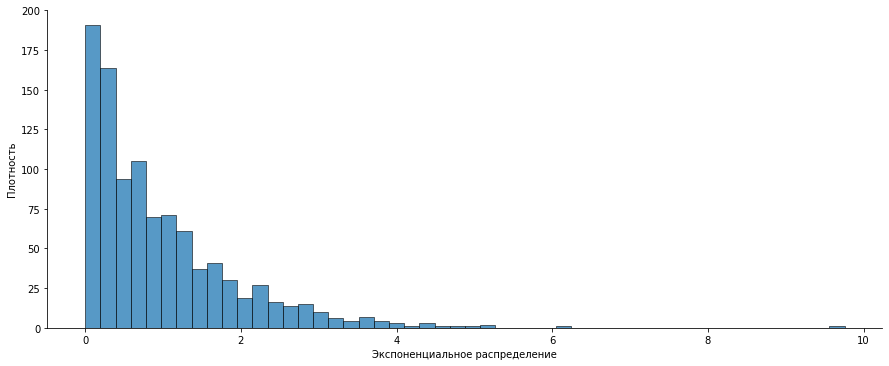

In [18]:
data = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.displot(data,
                  bins=50)
ax.fig.set_size_inches(14,5)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')

### Задание 9.4
В среднем новый холодильник служит 10 лет. Предположим, что продолжительность времени службы распределена экспоненциально.

Ответы округлите до трёх знаков после точки-разделителя.
1. Какова вероятность того, что холодильник прослужит более 7 лет?

In [22]:
lmbd = 1/10
ans1 = np.exp(-7*lmbd)
print(f'вероятность того, что холодильник прослужит более 7 лет {ans1:.3f}')

вероятность того, что холодильник прослужит более 7 лет 0.497


2. Какова вероятность того, что устройство прослужит от 9 до 11 лет?

In [26]:
ans2 = np.exp(-9*lmbd) - np.exp(-11*lmbd)
print(f'вероятность того, что устройство прослужит от 9 до 11 лет {ans2:.3f}')

вероятность того, что устройство прослужит от 9 до 11 лет 0.074


Чтобы закрепить весь пройденный материал, выполните следующие задания 
### Задание 10.1
В вашем офисе стоят два автомата, с кофе и с чаем. Вероятность того, что к концу дня ваши коллеги выпьют весь кофе, равна $0.2$. Для чая соответствующая вероятность равна $0.3$.

Найдите вероятность того, что хотя бы в одном из автоматов закончится напиток.

Считайте, что напитки заканчиваются независимо друг от друга.

In [30]:
(0.3+0.2) - 0.3*0.2

0.44

### Задание 10.2
1. Вы находитесь на благотворительном мероприятии и приобрели один билет для участия в розыгрыше.

Вам сообщают, что на мероприятии будет 200 человек (включая вас), и примерно $\frac{3}{4}$ участников мероприятия приобрели билеты на розыгрыш. Из этих людей равное количество купило один, два и три билета соответственно.

Если основываться на этих оценках и предполагать, что победитель будет только один, какова вероятность того, что вы выиграете? Ответ округлите до трёх знаков после точки-разделителя.

In [32]:
ans = 1/(50 +2*50 +3*50)
round(ans,3)

0.003

### Задание 10.4
Согласно прогнозу погоды на завтра, с вероятностью 50 % будет дождь в Пекине, с вероятностью 30 % — в Рио-де-Жанейро и с вероятностью 20 % — в Найроби.

Какова вероятность того, что завтра ни в одном из трёх указанных городов не будет дождя?

Поскольку эти три города находятся далеко друг от друга, предположим, что случаи дождя в этих городах независимы.

In [33]:
(1-0.5)*(1-0.3)*(1-0.2)

0.27999999999999997